In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud
import matplotlib as mpl
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns

# Análisis de comentarios del canal de Youtube Free Cover

¡Hola! En este Jupyter Notebook, te presento mi análisis de los comentarios en los videos del canal de Youtube: "Free Cover", un canal muy querido en Venezuela, por sus videos animados, con invitados muy relevantes para los venezolanos y latinos en general. Con el objetivo de entender mejor la interacción entre los usuarios y el contenido del canal, he recopilado datos de los comentarios y los he analizado usando técnicas de procesamiento de lenguaje natural y visualización de datos.

En este proyecto, presento varias visualizaciones de los datos que he recopilado, junto con sus códigos. A través de estas visualizaciones, podrás ver patrones interesantes en los comentarios de los usuarios, como las palabras y frases más utilizadas, las emociones predominantes en los comentarios, y más.

Espero que disfrutes explorando este análisis de los comentarios en el canal de Youtube "Free Cover" y que encuentres algunos hallazgos interesantes e informativos. ¡Empecemos!


(Nota sobre los datos: todo la información utilizada en este reporte fue recolectada en febrero 2023)

## Extracción de los comentarios

Para la extracción de los comentarios utilicé la __API__ de Google para Youtube, que te permite realizar peticiones de información de los videos, tales como: comentarios, fechas de los videos y sus comentarios, entre mucha otra información.

El código que utilicé para la extracción de los datos se encuentra en un archivo __.py__ separado (dentro del repositorio), y del cual el resultado es un archivo __xlsx__ (MS Excel) que contiene los datos que vamos a utilizar, y que a continuación vamos a cargar:

In [2]:
nombre_archivo = 'Comentarios-FreeCover(v2).xlsx'
comments_df = pd.read_excel(nombre_archivo, index_col=0)

# Convertimos las columnas de fechas a formato de fechas de Pandas:
comments_df['video_date'] = pd.to_datetime(comments_df['video_date'])
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'])

Lo que nos deja un dataframe con seis columnas, tres columnas que contienen texto, y dos columnas que contienen fechas:

In [3]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70453 entries, 0 to 70452
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           70453 non-null  object             
 1   video_title        70453 non-null  object             
 2   video_description  70453 non-null  object             
 3   video_date         70453 non-null  datetime64[ns, UTC]
 4   comment_text       70441 non-null  object             
 5   comment_date       70453 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 3.8+ MB


Veamos un poco el contenido:

In [3]:
comments_df.head()

,video_id,video_title,video_description,video_date,comment_text,comment_date
0,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49+00:00,Inviten a @guzman música,2023-02-04 20:03:23+00:00
1,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49+00:00,Debo reconocer que este Free Cover y el de Jua...,2022-12-20 23:00:08+00:00
2,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49+00:00,jabon sincero,2022-10-29 05:38:46+00:00
3,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49+00:00,Enamorada ❣️🤩 de los #Freecover,2022-03-01 14:30:03+00:00
4,bI-w7HaeJPU,[Free Cover Venezuela] Amor Sincero / La estoy...,Disfruta de “ #FreeCover ” en tu plataforma fa...,2017-10-22 20:49:49+00:00,"Un Free Cover de Guaco...de Adolescentes, Los ...",2022-02-21 16:30:48+00:00


Veamos cuantos comentarios hay en el dataframe:

In [4]:
comments_df.shape

(70453, 6)

Tenemeos entonces poco más de __70 mil__ comentarios en total, ¡Es extraordinario!

Comencemos con el análisis:

## Top 5 videos con más comentarios


Como primer paso en la exploración de los datos, vamos a crear un top con los 5 videos del canal que tienen la mayor cantidad de comentarios. Extrayendo esta información, podremos entender mejor qué videos generan más discusión entre los usuarios. Para llevar a cabo esta tarea voy a crear una visualización que nos permitirá observar, e interpretar los resultados más facilmente.


Para crear esta visualización, he utilizado una gráfica de barras en la que se muestran los 5 videos con la mayor cantidad de comentarios en orden descendente. De esta manera, podrás ver claramente cuáles son los videos más populares en términos de interacción y discusión en la comunidad de "Free Cover".


Además, en esta sección, también analizaremos algunas de las razones por las que estos videos pueden tener más comentarios que otros. ¿Es porque el contenido es especialmente interesante o porque es controvertido? ¿O puede ser simplemente porque son videos más antiguos y, por lo tanto, tienen más tiempo para acumular comentarios?


En cualquier caso, espero que esta visualización de los 5 videos con la mayor cantidad de comentarios te ayude a comprender mejor los intereses y preferencias de los usuarios en el canal.

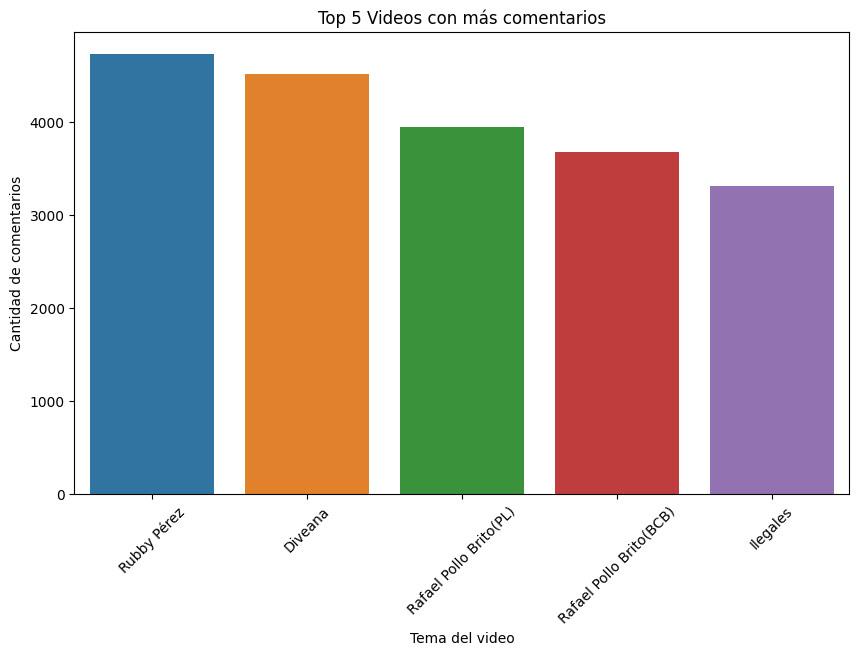

In [7]:
grouped = comments_df.groupby('video_title').count()['comment_text']
# Ordene el DataFrame agrupado en orden descendente según la cantidad de comentarios
sorted_df = grouped.sort_values(ascending=False)

# Selecciona los 5 mejores videos con más comentarios
top_5 = sorted_df[:5]

top_5.index = ['Rubby Pérez','Diveana','Rafael Pollo Brito(PL)','Rafael Pollo Brito(BCB)','Ilegales']

# Establecer una paleta de colores personalizada para las barras
colors = sns.color_palette('Set2', len(top_5))

# Cree un gráfico de barras usando la biblioteca seaborn con los 5 mejores videos seleccionados y su respectivo número de comentarios
plt.figure(figsize=(10,6))
sns.barplot(x=top_5.index, y=top_5)
plt.title('Top 5 Videos con más comentarios')
plt.xlabel('Tema del video')
plt.ylabel('Cantidad de comentarios')
plt.xticks(rotation=45)

plt.show()

* El video con más comentarios es el de __Rubby Pérez__, seguido muy de cerca por el video de __Diveana__, ambos videos rompieron la barrera de los 4000 comentarios.


* Sin embargo, __El Pollo Brito__ tiene dos videos (homenaje a Pastor López, y homenaje a Billo's Caracas Boys) en el top 5, hay más de 7000 comentarios entre amos videos, lo que lo convierte en el artista más comentado del canal.


* En quinto lugar está el video de los __Ilegales__.


* Dos artistas extranjeros se encuentran en los cinco videos más comentados.

## Wordclouds

En esta sección, vamos a crear unas visualizaciones de nubes de palabras a partir del texto de todos los comentarios en los videos.


Para crear estas visualizaciones, he utilizado la biblioteca __Wordcloud__ de Python. Las nubes de palabras son una forma divertida y efectiva de visualizar las palabras más utilizadas en los comentarios. Las palabras se muestran en diferentes tamaños y colores, donde las palabras más utilizadas aparecen en un tamaño más grande y las menos utilizadas en un tamaño más pequeño.


En esta sección, te mostraré varias nubes de palabras creadas a partir de diferentes conjuntos de comentarios. A través de estas visualizaciones, podrás tener una idea general de los temas y las palabras que se utilizan con más frecuencia en los comentarios del canal.


¡Así que prepárate para explorar estas impresionantes nubes de palabras y descubrir las palabras más utilizadas en los comentarios de los usuarios del canal "Free Cover"!

In [4]:
def create_wordcloud(df, column_name, stop_words=None):
    """
    La función create_wordcloud crea una nube de palabras a partir del texto de una columna de un DataFrame de pandas.

    Argumentos:

        df: un DataFrame de pandas que contiene los datos de texto.
        column_name: el nombre de la columna que contiene el texto.
        stop_words (opcional): una lista de palabras a excluir de la nube de palabras.

    Retorno:

        No devuelve ningún valor, pero muestra la nube de palabras generada con matplotlib.
    """

    # Combine all the text from the selected column into a single string
    text = ' '.join(df[column_name].astype(str))

    # Create a wordcloud from the text
    wordcloud = WordCloud(
        background_color='black',
        width=800,
        height=400,
        colormap=mpl.colormaps['rainbow'],
        max_words=60,
        collocations=False,
        stopwords=stop_words
    ).generate(text)

    # Display the wordcloud
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


A continuación vemos una wordcloud de todos los comentarios, y podemos decir que está claro que a las personas que comentan les parece "Excelente" la música y la alegría de los músicos y cantantes, y dan las "Gracias" por el contenido.

In [5]:
# Añadimos las "stopwords" en español, y algunas adicionales para limpiar la visualización:
esp_stop = stopwords.words('spanish')
esp_stop = esp_stop + ['si','va','ahora','hace', 'cover', 'free', 'gracia']

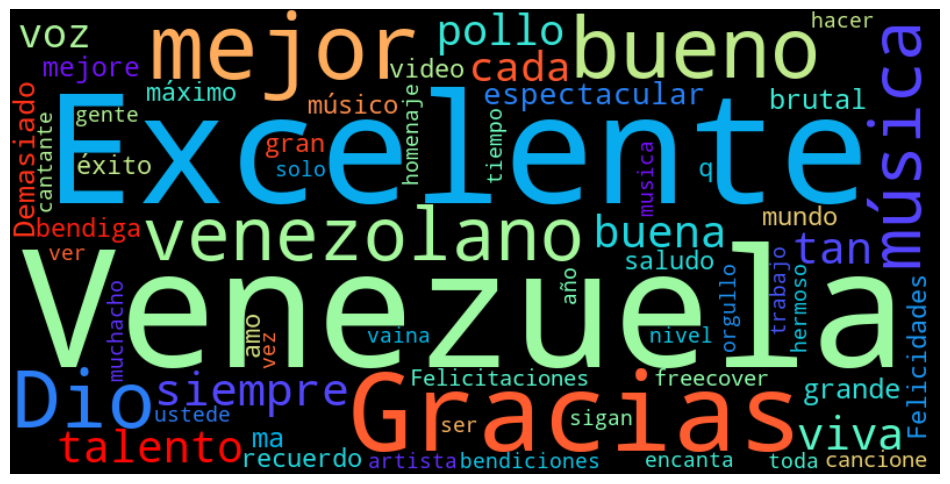

In [20]:
create_wordcloud(comments_df, 'comment_text', esp_stop)

Veamos un wordcloud del artista más comentado, __Pollo Brito__:

In [9]:
# Añadimos las palabras: "pollo", y "Brito" debido a que no aportan mucha información, y le quitan espacio a otras palabras con una mayor entropia:
esp_stop = esp_stop + ['pollo', 'Brito']

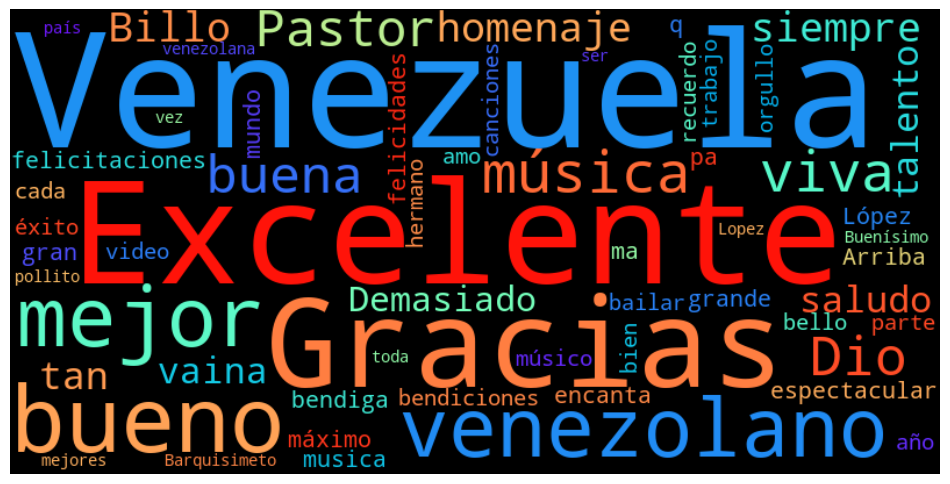

In [12]:
create_wordcloud(comments_df[comments_df['video_title'].isin(['[Free Cover] Billos Caracas Boys - Rafael Pollo Brito',
                                                              '[Free Cover] Homenaje a Pastor López - Rafael Pollo Brito'
                                                              ],)], 'comment_text', esp_stop)

* De nuevo, las personas comentan lo "Excelente" que es el espectáculo, y mencionan a Venezuela.


* Tambien dan "gracias", y lo "felicitan", y pienso que muy merecidas, __El Pollo Brito__ es muy querido en Venezuela.


* Se menciona tambíen a __Barquisimeto__, ciudad de la cual __El Pollo Brito__ es oriundo, y a los artistas que son objeto del homenaje: __Billo Frometa__, y __Pastor López__.

In [14]:
# Añadimos las palabras: "Rubbt", y "Pérez" debido a que no aportan mucha información, y le quitan espacio a otras palabras con una mayor entropia:
esp_stop = esp_stop + ['Rubby', 'Ruby', 'Pérez']

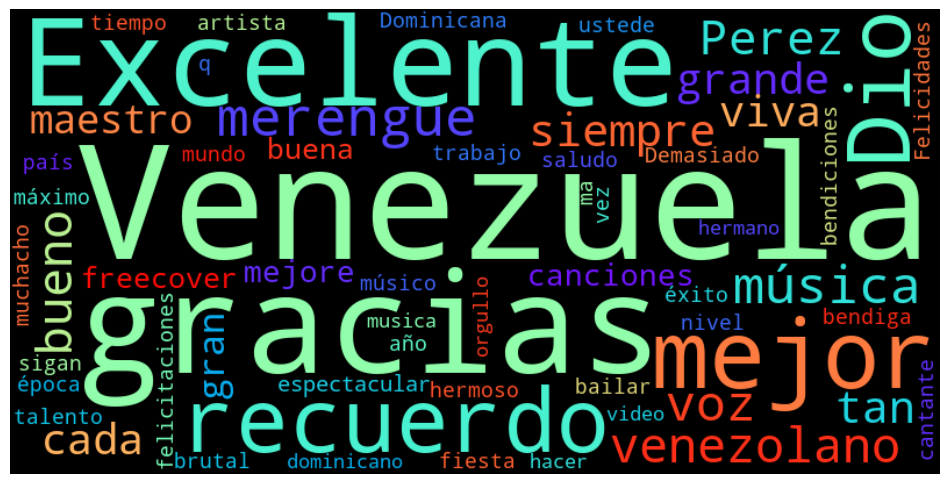

In [15]:
create_wordcloud(comments_df[comments_df['video_title'].isin(['[Free Cover] Free Cover Ft. Rubby Pérez'
                                                              ],)], 'comment_text', esp_stop)

* Sigue siendo recurrente el agradecimiento de las personas que ven los videos.


* Adicionalmente, este video les trajo "recuerdos" a las personas, y no es de extrañarse, __Rubby Pérez__ es un ícono del "merengue" de los 80, y 90 muy querido en Venezuela, donde este género musical __pone a la gente a bailar__.

## Mapas de calor


Y para cerrar, en esta sección, exploraremos los patrones de comportamiento de los usuarios del canal al comentar en los videos. Para ello, he creado dos visualizaciones de mapas de calor, en los que se muestran los días de la semana, y las horas del día en que se realizan los comentarios.

Los mapas de calor son una herramienta útil para visualizar la frecuencia de los comentarios en diferentes momentos de la semana y del día, dicha frecuencia se codifica en el color del mapa, siendo un color blanco o amarillo para cuando la densidad de comentarios es baja, y rojo, cuando es alta. A través de estas visualizaciones, podremos entender mejor cuándo los usuarios son más activos en la comunidad "Free Cover".

Al analizar los patrones que emergen en estos mapas de calor, podremos responder preguntas interesantes como ¿Los usuarios son más activos en los días laborales o en los fines de semana? ¿A qué horas del día se realizan más comentarios? ¿Hay algún patrón en los días de la semana en los que se realizan más comentarios?

In [72]:
def create_heatmap(df, column_name):

    """
    La función create_heatmap crea un mapa de calor que muestra la distribución de los comentarios de YouTube por día de la semana y hora del día en un canal determinado.

        Argumentos:

            df: un DataFrame de pandas que contiene los datos de comentarios de YouTube.
            column_name: el nombre de la columna que contiene la fecha y hora de cada comentario.

        Retorno:

            No devuelve ningún valor, pero muestra el mapa de calor generado con matplotlib.
    """

    # Convierta la columna de fecha a fecha y hora
    df[column_name] = pd.to_datetime(df[column_name])

    # Crea una tabla dinámica con el número de comentarios por día de la semana y hora del día
    pivot_table = df.pivot_table(index=df[column_name].dt.dayofweek, columns=df[column_name].dt.hour, aggfunc='size', fill_value=0)

    # Defina las etiquetas para los ejes x e y
    weekdays = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    hours = np.arange(0, 24)

    # Crear la trama del mapa de calor
    fig, ax = plt.subplots(figsize=(10, 8))  # adjust the figsize parameter to your liking
    im = ax.imshow(pivot_table, cmap='YlOrRd')

    # Establecer las etiquetas de marca para el eje x
    ax.set_xticks(hours)
    ax.set_xticklabels([f'{h:02}:00' for h in hours], rotation=45, ha='right')

    # Establecer las etiquetas de marca para el eje y
    ax.set_yticks(np.arange(len(weekdays)))
    ax.set_yticklabels(weekdays)

    # Añade la barra de colores
    cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal')
    cbar.ax.set_xlabel("Cantidad de comentarios")

    # Establecer el título y las etiquetas de la trama
    ax.set_title("Distribución semanal y horaria de comentarios de YouTube en el canal de Free Cover")
    ax.set_xlabel("Hora del día")
    ax.set_ylabel("Día de la semana")

    # Mostrar la visualización
    plt.show()


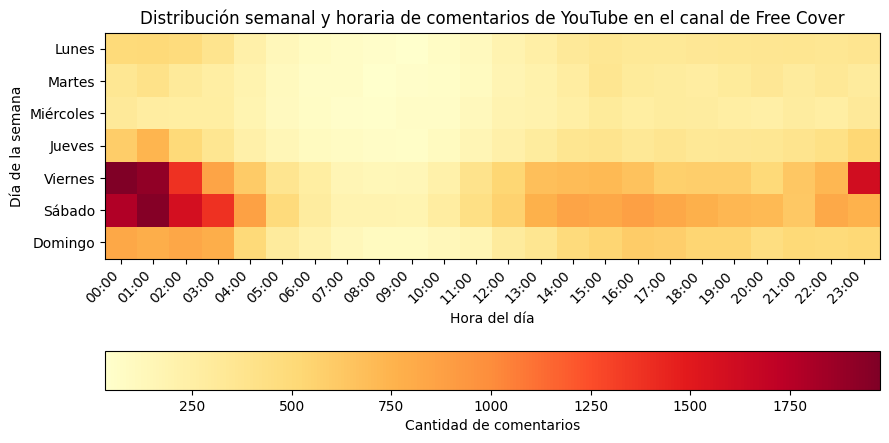

In [73]:
create_heatmap(comments_df, 'comment_date')

La distribución horaria de más de 70 mil comentarios del canal, hace resaltar que:


* La franja horaria donde las personas escriben más es durante las 11:00 pm a 02:00 am los viernes, y de 12:00 am a 3:00 am de la mañana los sábados.


* Tomando en cuenta lo expuesto en el punto anterior, las personas que comentan los vídeos lo hacen mientras lo disfrutan con su respectiva "birra" en la mano 🤣🤣🤣.


* Es bastante obvio que las personas disfrutan de los videos de Free Cover durante las horas de esparcimiento, y de entretenimiento nocturnas, donde se distraen con la música. Este hecho no sorprende, los géneros musicales que Free Cover toca son los más escuchados durante las "rumbas" venezolanas, y caribeñas, principalmente.

El estudio de análisis de sentimiento lo dejaremos para una próxima entrega debido a que voy a crear un mini proyecto de __Fine-Tuning__ de un modelo de lenguaje.